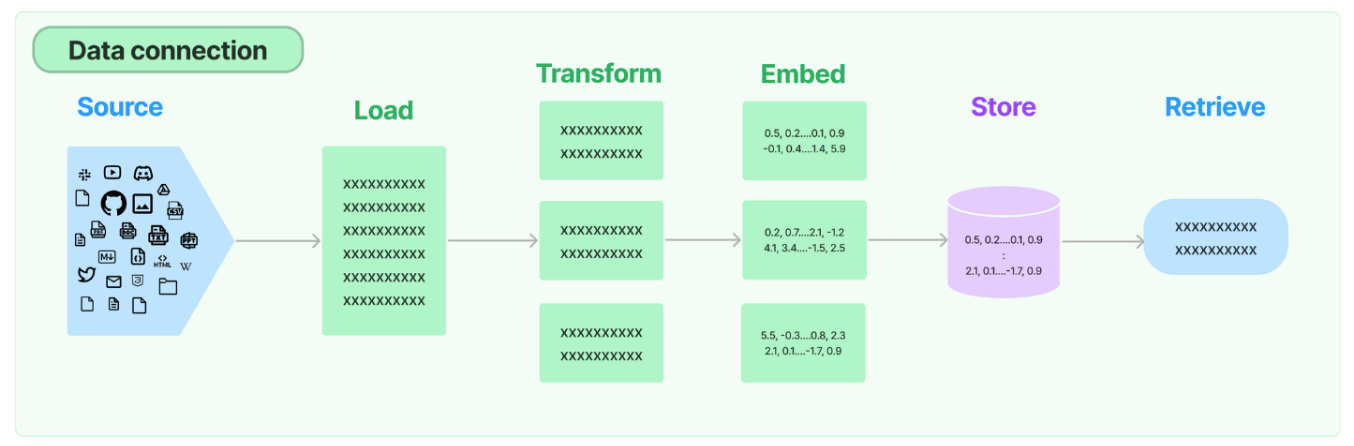

## 1. Librerías

In [9]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain_huggingface import HuggingFaceEmbeddings

## 2. Arquitectura de Conexión de Datos

### *2.1. Cargar Documentos*

Cargar documentos de muchas fuentes diferentes.

In [10]:
cargador = TextLoader('document/muestra.txt')
documentos = cargador.load()

In [11]:
len(documentos)

1

### *2.2. Transformadores de Documentos*

Divide documentos y elimina documentos redundantes.

In [12]:
dividir_texto = CharacterTextSplitter(chunk_size= 200, chunk_overlap= 0)

textos = dividir_texto.split_documents(documentos)

Created a chunk of size 495, which is longer than the specified 200
Created a chunk of size 449, which is longer than the specified 200
Created a chunk of size 441, which is longer than the specified 200
Created a chunk of size 540, which is longer than the specified 200
Created a chunk of size 374, which is longer than the specified 200
Created a chunk of size 471, which is longer than the specified 200
Created a chunk of size 377, which is longer than the specified 200
Created a chunk of size 399, which is longer than the specified 200
Created a chunk of size 315, which is longer than the specified 200
Created a chunk of size 359, which is longer than the specified 200
Created a chunk of size 385, which is longer than the specified 200
Created a chunk of size 339, which is longer than the specified 200
Created a chunk of size 375, which is longer than the specified 200
Created a chunk of size 377, which is longer than the specified 200
Created a chunk of size 415, which is longer tha

In [13]:
len(textos)

19

In [14]:
textos

[Document(metadata={'source': 'document/muestra.txt'}, page_content='India, oficialmente conocida como la República de la India, es un país diverso y vibrante ubicado en el sur de Asia. Con una rica historia milenaria, India es conocida por su patrimonio cultural, diversidad religiosa y vastos paisajes. Desde el majestuoso Himalaya en el norte hasta los serenos remansos de Kerala en el sur, India abarca una amplia gama de accidentes geográficos, incluyendo desiertos, llanuras, montañas y costas, lo que la convierte en una tierra de increíble belleza natural.'),
 Document(metadata={'source': 'document/muestra.txt'}, page_content='La India es el séptimo país más grande del mundo en cuanto a superficie y el segundo más poblado del mundo, con una población que supera los 1.300 millones de personas. Es una república democrática parlamentaria federal, con un presidente como jefe de Estado y un primer ministro como jefe de Gobierno. El país sigue una estructura administrativa de varios nivele

### *2.3. Modelos de Incrustración de Texto*

Tome texto no estructurado y conviértalo en una lista de números de punto flotante.

Un `modelo de transformadores de oraciones` está diseñado para transformar oraciones y párrafos en un espacio vectorial de alta dimensión de 384 dimensiones. Este modelo es particularmente útil para tareas como la agrupación o la búsqueda semántica, donde las representaciones vectoriales pueden emplearse para medir la similitud y realizar operaciones de recuperación eficientes.

In [15]:
incrustrador = HuggingFaceEmbeddings(model_name= 'paraphrase-MiniLM-L6-v2')

### *2.4. Tiendas Vector (Vector Stores)*

Almacenar y buscar sobre datos incrustados.

Una base de datos de código abierto con integración nativa de IA, diseñada para facilitar la creación de aplicaciones LLM, permitiendo que los conocimientos, datos y habilidades sean compatibles con los LLM. Su uso es gratuito bajo una licencia Apache 2.0.

#### 2.4.1. Cargar incrustaciones de texto en Chroma

In [16]:
db = Chroma.from_documents(textos, incrustrador) # Incrustamos los textos en el vectorstore.

#### 2.4.2. Echemos un vistazo a las incrustaciones: Representación numérica

In [17]:
db._collection.get(include= ['embeddings'])

{'ids': ['c349c7b9-f795-4af1-a428-85078507bdd0',
  '2ba68ad1-2e03-4039-b7c2-66f056d9b51c',
  '729387ed-7748-448f-ad2e-2142807441f5',
  '3b160218-6071-4e40-9f3a-9a84ff5b6871',
  '5bfaacf0-157f-4eb5-be49-38b2cbfd141e',
  '8e65c0cd-9f27-4a7a-9f9e-26acbd766f7e',
  '4c709266-c785-479d-b808-8c9883d6e170',
  '5f7fd4aa-a7b8-4f9b-a44b-8995bb6bb9c9',
  'e7b3a74f-5888-4ed7-8689-90426996e3b4',
  '69d47486-69aa-4046-8edd-3007c94befd8',
  'ce0099f7-ee53-475f-8121-392984153249',
  'a2193d72-a417-4694-ac05-c43d8d296f55',
  '93360cac-a900-4797-a85b-67779edff8cf',
  '350a2166-96dd-4e73-8e23-93a5505e6aa6',
  '3ac63a5e-26b2-4e1e-b354-91d056463df1',
  'cee283cc-afc6-4879-ba6c-54580b32a8e7',
  'b772e2ca-fa21-45de-b755-365130de7e32',
  '2b9aa005-9cb2-4beb-9f0d-39c9cd5eea02',
  'e7c89f9f-f44d-4ef4-b2ac-921e80e1bf14'],
 'embeddings': array([[ 0.15048611,  0.00263604, -0.03938627, ..., -0.2445437 ,
          0.23065642,  0.23640755],
        [ 0.04766869, -0.1787087 , -0.12610847, ..., -0.24913548,
          0.

### *2.5. Recuperar*

Consulta a nuestros datos.

Un `recuperador de almacén vectorial` es un sistema de recuperación que utiliza un almacén vectorial para obtener documentos. Actúa como una interfaz simplificada para la clase Almacén vectorial, adaptándola a la interfaz del recuperador. Al aprovechar las funcionalidades de búsqueda que ofrece el almacén vectorial, como la búsqueda por similitud y la Relevancia Marginal Máxima (MMR), el recuperador realiza consultas sobre los datos de texto contenidos en el almacén vectorial.

También puede especificar el valor k de 'kwargs de búsqueda' como 1,2,3... para utilizar al realizar la recuperación.

In [18]:
recuperar = db.as_retriever(search_kwargs= {'k': 1})

In [19]:
recuperar

VectorStoreRetriever(tags=['Chroma', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x74c6003adc00>, search_kwargs={'k': 1})

## 3. Consultas

### *3.1. Pregunta 1*

La función `invoke()` proporciona la lista de documentos relevantes. En función de su elección, puede continuar.

In [20]:
documentos = recuperar.invoke('Cual es la capital de la India?')

In [21]:
documentos

[Document(metadata={'source': 'document/muestra.txt'}, page_content='Delhi es la capital de la India.')]

### *3.2. Pregunta 2*

In [22]:
documentos = recuperar.invoke('Cual es la moneda de la India?')

In [23]:
documentos

[Document(metadata={'source': 'document/muestra.txt'}, page_content='El signo de la rupia india (₹) es el símbolo monetario de la rupia india, la moneda oficial de la India.')]